<a href="https://colab.research.google.com/github/vlyubchich/sem_visual/blob/main/SemopySandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

This section sets up the required packages and functions.

In [1]:
!pip install semopy

In [2]:
import numpy as np
import pandas as pd
import semopy

# Simulated data example

Here, we create data for the analysis.
Simulated data give an advantage here since we know the underlying true relationships.

In the simulated example below, each variable x01, x02, and x03 is correlated with two other variables and not with the third.
For example, x01 is correlated with x11 and x12 but not x13.
In turn, the response variable (the variable of interest) y is correlated with x01 and x02 but not x03.
Knowing these underlying true relationships, we can assess how the modeling approach can show them.

In [6]:
# Set random seed for reproducibility
np.random.seed(123)

# Create synthetic data
n_samples = 100

# Independent variables
x11 = np.random.normal(size = n_samples)
x12 = np.random.normal(size = n_samples)
x13 = np.random.normal(size = n_samples)
x01 = 2 * x11 + 3 * x12 + np.random.normal(size = n_samples)

x21 = np.random.normal(size = n_samples)
x22 = np.random.normal(size = n_samples)
x23 = np.random.normal(size = n_samples)
x02 = -2 * x21 + 3 * x22 + np.random.normal(size = n_samples)

x31 = np.random.normal(size = n_samples)
x32 = np.random.normal(size = n_samples)
x33 = np.random.normal(size = n_samples)
x03 = 2 * x31 - 3 * x32 + np.random.normal(size = n_samples)

# Dependent variable (response variable)
# Here y is related to x1 and x2, but unrelated to x3 and x4
y = 2 * x01 - 3 * x02 + np.random.normal(size = n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'x11': x11, 'x12': x12, 'x13': x13, 'x01': x01,
    'x21': x21, 'x22': x22, 'x23': x23, 'x02': x02,
    'x31': x31, 'x32': x32, 'x33': x33, 'x03': x03,
    'y': y
})

# Display the first few rows of the DataFrame
print(df.head())

        x11       x12       x13       x01       x21       x22       x23  \
0 -1.085631  0.642055  0.703310  0.519958  1.534090  0.752034  1.140656   
1  0.997345 -1.977888 -0.598105 -4.767962 -0.529914  0.069641 -0.788166   
2  0.282978  0.712265  2.200702  2.043600 -0.490972 -0.265446  0.265234   
3 -1.506295  2.598304  0.688297  5.393446 -1.309165  0.929584 -0.372272   
4 -0.578600 -0.024626 -0.006307 -1.375092 -0.008660  1.260821  1.174600   

        x02       x31       x32       x33       x03          y  
0 -0.773632 -0.121167  0.551302 -0.748827 -2.541166   4.472515  
1  0.320252 -2.008585  0.419589  0.567595 -3.700289 -10.315722  
2  1.798989 -0.920647  1.815652  0.718151 -6.534973   0.023032  
3  5.788005  0.168234 -0.252750 -0.999381  1.379189  -5.588199  
4  3.548747 -1.319892 -0.292004  0.474898 -1.558910 -14.013396  


# Full model

Implement structural equation modeling (SEM) to the data.

In [37]:
# Specify the model
m0_spec = """
y ~ x01
y ~ x02
y ~ x03

x01 ~ x11
x01 ~ x12
x01 ~ x13

x02 ~ x21
x02 ~ x22
x02 ~ x23

x03 ~ x31
x03 ~ x32
x03 ~ x33
"""

# Create a SEM model object
m0 = semopy.Model(m0_spec)

# Fit the model to the data (i.e., estimate model coefficients)
m0.fit(df)

# Print the model results
print(m0.inspect())

   lval  op rval  Estimate  Std. Err     z-value       p-value
0   x01   ~  x11  1.917685  0.076009   25.229780  0.000000e+00
1   x01   ~  x12  3.076959  0.088268   34.859313  0.000000e+00
2   x01   ~  x13  0.162307  0.088467    1.834661  6.655595e-02
3   x02   ~  x21 -2.057721  0.105745  -19.459329  0.000000e+00
4   x02   ~  x22  2.833962  0.109619   25.852812  0.000000e+00
5   x02   ~  x23  0.054668  0.115523    0.473219  6.360566e-01
6   x03   ~  x31  1.938079  0.102340   18.937593  0.000000e+00
7   x03   ~  x32 -2.946491  0.107322  -27.454758  0.000000e+00
8   x03   ~  x33 -0.147945  0.107310   -1.378667  1.679974e-01
9     y   ~  x01  2.041009  0.023320   87.522300  0.000000e+00
10    y   ~  x02 -3.002836  0.023725 -126.569656  0.000000e+00
11    y   ~  x03 -0.013848  0.025315   -0.547027  5.843605e-01
12  x01  ~~  x01  0.732505  0.103592    7.071068  1.537437e-12
13  x02  ~~  x02  1.171400  0.165661    7.071068  1.537437e-12
14  x03  ~~  x03  0.980714  0.138694    7.071068  1.537

Show the plot with standardized coefficients and p-values (p-values quantify the statistical significance of the coefficients; typically, if p-value < 0.05, the result is statistically significant).

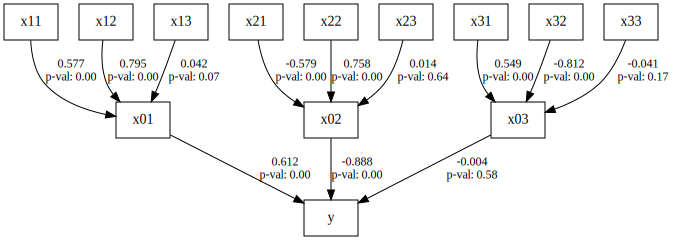

In [31]:
semopy.semplot(m0, "m0.png", std_ests = True)

# Reduced model

Remove from the full model variables or relationships that are not statistically significant.

In [34]:
# Set a threshold for statistical significance
alpha = 0.05

# Identify non-significant relationships based on p-values
m0_results = m0.inspect()
non_significant_relationships = m0_results[m0_results['p-value'] > alpha]

# Create a new model specification by removing non-significant relationships
reduced_spec = m0_spec
for index, row in non_significant_relationships.iterrows():
  relationship = f"{row['lval']} ~ {row['rval']}"
  reduced_spec = reduced_spec.replace(relationship, "")

# Create a SEM model object for the reduced model
m1 = semopy.Model(reduced_spec)

# Fit the reduced model to the data
m1.fit(df)

# Print the reduced model results
print(m1.inspect())

   lval  op rval  Estimate  Std. Err     z-value       p-value
0   x01   ~  x11  1.909293  0.077127   24.755254  0.000000e+00
1   x01   ~  x12  3.080561  0.089704   34.341451  0.000000e+00
2   x02   ~  x21 -2.048597  0.104117  -19.675994  0.000000e+00
3   x02   ~  x22  2.837301  0.109498   25.911992  0.000000e+00
4     y   ~  x01  2.041721  0.023338   87.484357  0.000000e+00
5     y   ~  x02 -3.001224  0.023668 -126.804795  0.000000e+00
6   x03   ~  x31  1.947034  0.103102   18.884467  0.000000e+00
7   x03   ~  x32 -2.977470  0.105859  -28.126805  0.000000e+00
8   x01  ~~  x01  0.756924  0.107045    7.071068  1.537437e-12
9   x02  ~~  x02  1.174109  0.166044    7.071068  1.537437e-12
10  x03  ~~  x03  0.999318  0.141325    7.071068  1.537437e-12
11    y  ~~    y  0.747675  0.105737    7.071068  1.537437e-12


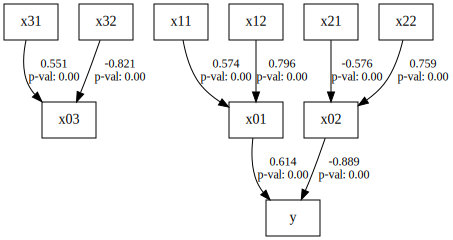

In [35]:
semopy.semplot(m1, "m1.png", std_ests = True)

In this plot, information about the variables that were not statistically significant was removed.
The user will not be obstracted by their results but also will not see whether those variables were considered.